# Settings
## Import modules

In [1]:
import os
import natsort
import librosa, librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

# A short wav File
file = './MeaningOfYou_drums(MIDI)_cut.wav'
# file = './MeaningOfYou_drums(HPSS)_cut.wav'

## Librosa Test

### 1. Onset Detect
##### 1) Sample Rate

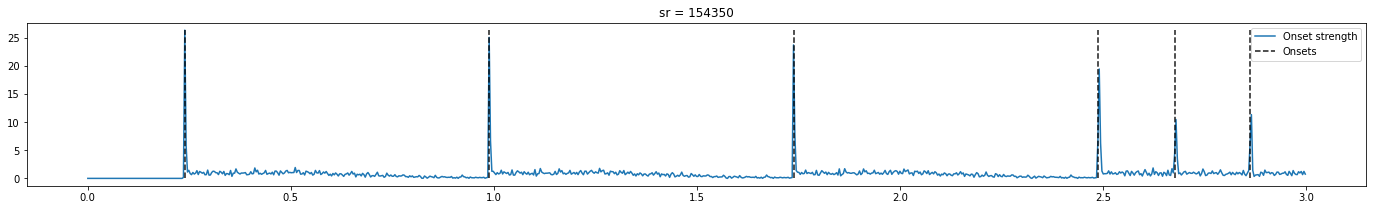

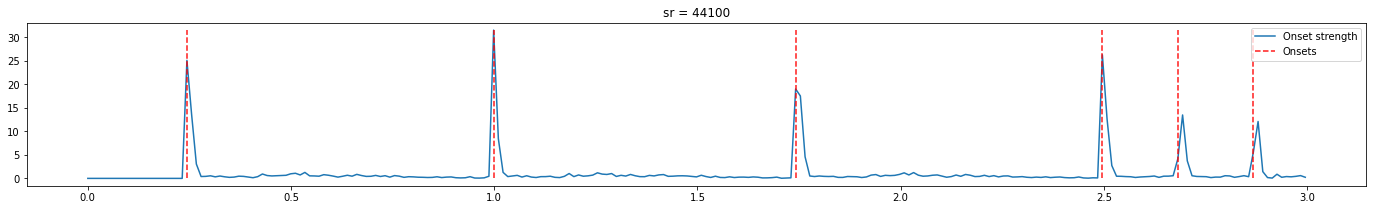

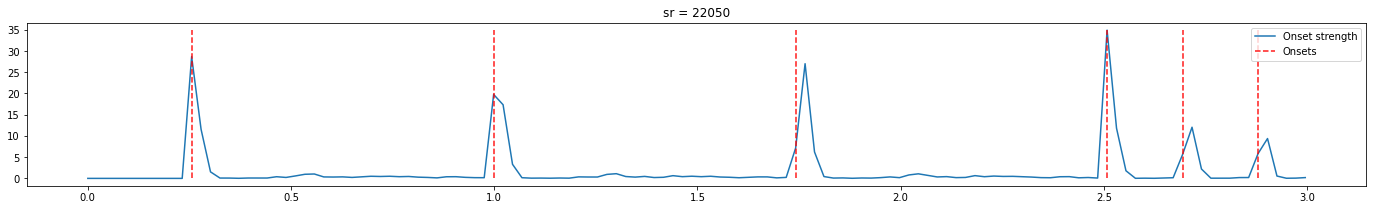

In [2]:
# sr = 154350
x, sr = librosa.load(file, sr=154350, duration=3)
o_env = librosa.onset.onset_strength(y=x, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(x))
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24, 3))
ax.set(title='sr = 154350')
ax.plot(times, o_env, label='Onset strength')
t_154350 = times[onset_frames]
ax.vlines(t_154350, 0, o_env.max(), color='black', alpha=0.9, linestyle='--', label='Onsets')
ax.legend()
#############################################################################################

# sr = 44100
x, sr = librosa.load(file, sr=44100, duration=3)
o_env = librosa.onset.onset_strength(y=x, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(x))
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24, 3))
ax.set(title='sr = 44100')
ax.plot(times, o_env, label='Onset strength')
t_44100 = times[onset_frames]
ax.vlines(t_44100, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
ax.legend()
#############################################################################################

# sr = 22050
x, sr = librosa.load(file, duration=3)
o_env = librosa.onset.onset_strength(y=x, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(x))
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24, 3))
ax.set(title='sr = 22050')
ax.plot(times, o_env, label='Onset strength')
t_22050 = times[onset_frames]
ax.vlines(t_22050, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
ax.legend()
#############################################################################################

##### 2) Waveforms

Text(180.625, 0.5, 'Amplitude')

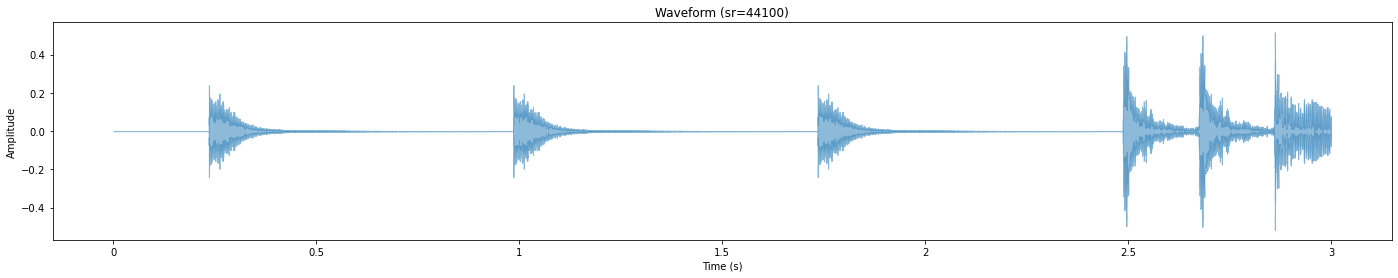

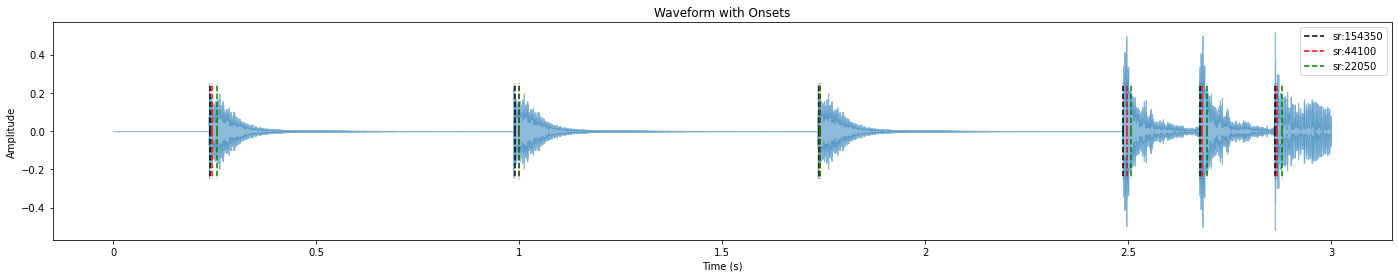

In [3]:
# Waveform (sr=44100)
x, sr = librosa.load(file, sr=44100, duration=3)
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24,4))
ax.set(title='Waveform (sr=44100)')
ax.label_outer()
librosa.display.waveshow(x, sr=sr, alpha=0.5, ax=ax)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# With Onsets
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24,4))
ax.set(title='Waveform with Onsets')
ax.label_outer()
librosa.display.waveshow(x, sr=sr, alpha=0.5, ax=ax)
ax.vlines(t_154350, 0, 0.25, color='black', alpha=1, linestyle='--', label='sr:154350')
ax.vlines(t_154350, 0, -0.25, color='black', alpha=1, linestyle='--')
ax.vlines(t_44100, 0, 0.25, color='r', alpha=1, linestyle='--', label='sr:44100')
ax.vlines(t_44100, 0, -0.25, color='r', alpha=1, linestyle='--')
ax.vlines(t_22050, 0, 0.25, color='g', alpha=1, linestyle='--', label='sr:22050')
ax.vlines(t_22050, 0, -0.25, color='g', alpha=1, linestyle='--')
ax.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

### 2. Onset Backtrack (sr = 44100)

In [4]:
y, sr = librosa.load(file, sr=44100, duration=3)
oenv = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(oenv, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, sr=sr)
onset_bt1 = times[librosa.onset.onset_detect(onset_envelope=oenv, backtrack=True, sr=sr)]
onset_bt2 = times[librosa.onset.onset_backtrack(onset_raw, oenv)]
onset_raw = times[onset_raw]

print(f"onset_raw\t: Distance(gap)\t\t{len(onset_raw)} detections.")
tmp = 0
for t in onset_raw:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t       
tmp = 0
print(f"\nonset_bt1\t: Distance(gap)\t\t{len(onset_bt1)} detections.")
for t in onset_bt1:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t
tmp = 0
print(f"\nonset_bt2\t: Distance(gap)]t\t{len(onset_bt2)} detections.")
for t in onset_bt2:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t

onset_raw	: Distance(gap)		6 detections.
0.2438		: 0.2438
0.9985		: 0.7546
1.7415		: 0.743
2.4961		: 0.7546
2.6819		: 0.1858
2.8677		: 0.1858

onset_bt1	: Distance(gap)		6 detections.
0.2322		: 0.2322
0.9636		: 0.7314
1.7067		: 0.743
2.4845		: 0.7779
2.6355		: 0.1509
2.8561		: 0.2206

onset_bt2	: Distance(gap)]t	6 detections.
0.2322		: 0.2322
0.9636		: 0.7314
1.7067		: 0.743
2.4845		: 0.7779
2.6355		: 0.1509
2.8561		: 0.2206


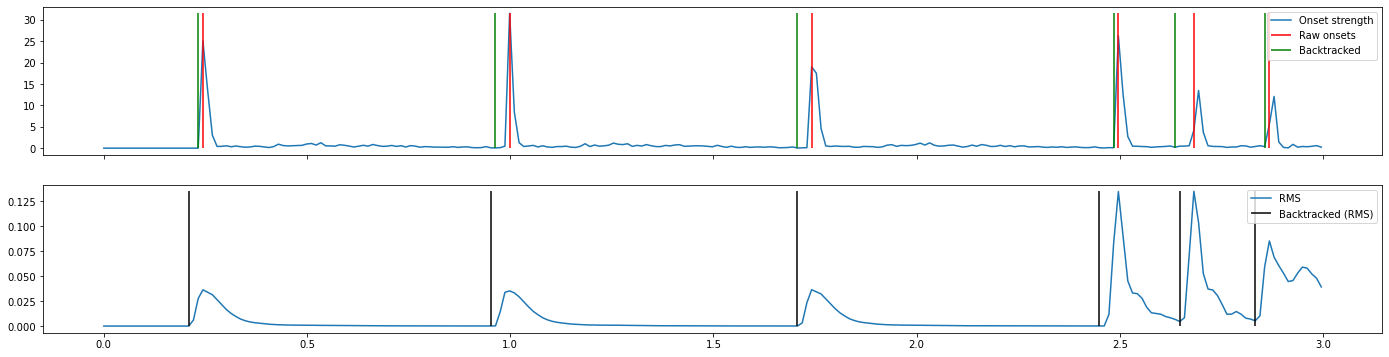

In [5]:
y, sr = librosa.load(file, sr=44100, duration=3)
oenv = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(oenv, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False, sr=sr)
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)

# Backtrack the events using the RMS values
S = np.abs(librosa.stft(y=y))
rms = librosa.feature.rms(S=S)
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

# Plot the results
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(24, 6))

onset_raw = times[onset_raw]
onset_bt = times[onset_bt]
ax[0].plot(times, oenv, label='Onset strength')
ax[0].vlines(onset_raw, 0, oenv.max(), label='Raw onsets', color='r')
ax[0].vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='g')
ax[0].legend()
ax[0].label_outer()

onset_bt_rms = times[onset_bt_rms]
ax[1].plot(times, rms[0], label='RMS')
ax[1].vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='black')
ax[1].legend()

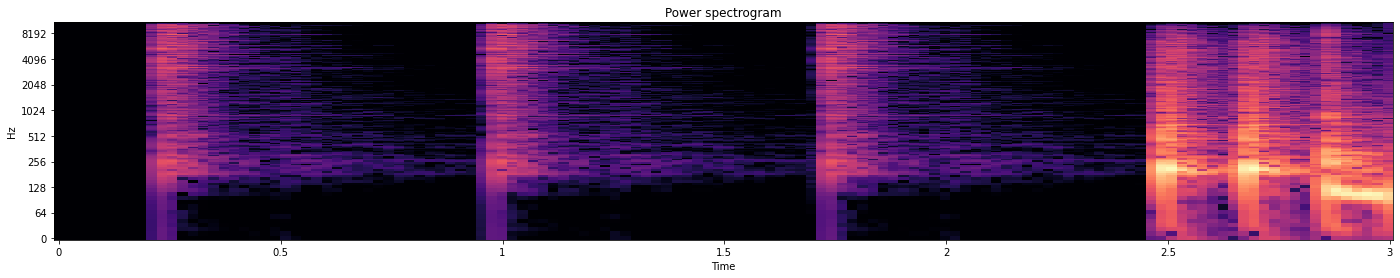

In [6]:
#power spectrogram
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Power spectrogram')
ax.label_outer()

Text(180.625, 0.5, 'Amplitude')

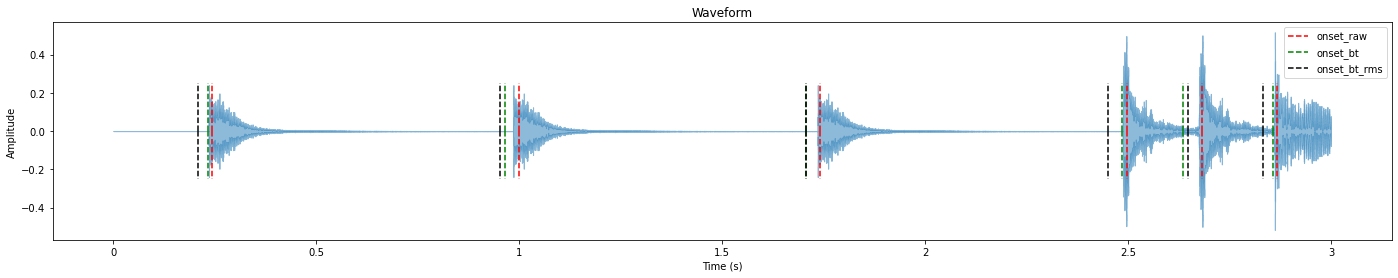

In [7]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(24,4))
ax.set(title='Waveform')
ax.label_outer()
librosa.display.waveshow(x, sr=sr, alpha=0.5, ax=ax)
ax.vlines(onset_raw, 0, 0.25, color='r', alpha=1, linestyle='--', label='onset_raw')
ax.vlines(onset_raw, 0, -0.25, color='r', alpha=1, linestyle='--')
ax.vlines(onset_bt, 0, 0.25, color='g', alpha=1, linestyle='--', label='onset_bt')
ax.vlines(onset_bt, 0, -0.25, color='g', alpha=1, linestyle='--')
ax.vlines(onset_bt_rms, 0, 0.25, color='black', alpha=1, linestyle='--', label='onset_bt_rms')
ax.vlines(onset_bt_rms, 0, -0.25, color='black', alpha=1, linestyle='--')
ax.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [8]:
print(f"onset_raw\t: Distance(gap)\t\t{len(onset_raw)} detections.")
tmp = 0
for t in onset_raw:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t
          
tmp = 0
print(f"\nonset_bt\t: Distance(gap)\t\t{len(onset_bt)} detections.")
for t in onset_bt:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t

tmp = 0
print(f"\nonset_bt_rms\t: Distance(gap)]t\t{len(onset_bt_rms)} detections.")
for t in onset_bt_rms:
    print(f"{round(t, 4)}\t\t: {round((t-tmp),4)}")
    tmp = t

onset_raw	: Distance(gap)		6 detections.
0.2438		: 0.2438
0.9985		: 0.7546
1.7415		: 0.743
2.4961		: 0.7546
2.6819		: 0.1858
2.8677		: 0.1858

onset_bt	: Distance(gap)		6 detections.
0.2322		: 0.2322
0.9636		: 0.7314
1.7067		: 0.743
2.4845		: 0.7779
2.6355		: 0.1509
2.8561		: 0.2206

onset_bt_rms	: Distance(gap)]t	6 detections.
0.209		: 0.209
0.952		: 0.743
1.7067		: 0.7546
2.4497		: 0.743
2.6471		: 0.1974
2.8328		: 0.1858
